# **Laporan Proyek Machine Learning (Job Recommender System)- Muhammad Adin Palimbani**

## **Project Overview**
Sejak pandemi COVID-19 terjadi di tahun 2020, sebagian besar negara mengahadapi masalah akut dalam menyediakan pekerjaan bagi kaum muda. Penurunan aktivitas ekonomi secara drastus membuat bisnis menjadi rapuh secara finansial yang menyebabkan banyak orang diberhentikan dari pekerjaan mereka. Kondisi ini juga membuat perusahaan tidak mampu memperkerjakan karyawan baru dan mempersulit para pencari kerja dalam mendapatkan pekerjaan mereka. <br>

Pada tahun 2020, Organisasi Perburuhan International menempatkan tingkat pengangguran kaum muda Indonesia sebagai tertinggi kedua di Asia Tenggara. Meskipun jumlah lulusan perguruan tinggi di Indonesia meningkat setiap tahun, angkat pengangguran di kalangan anak muda juga meningkat dan lebih tinggi setelah pandemi. Situasi ini menunjukkan bahwa sebagian besar pencari kerja muda dengan pendidikan tinggi mengalami kesulitan dalam mencari pekerjaan. Tidak hanya itu, menurut studi Willis Towers Watson terkait Talent Management and Rewards, 8 dari 10 perusahaan di Indonesia mengalami kesulitan menemukan lulusan perguruan tinggi dengan keterampilan yang dibutuhkan perusahaan mereka. Oleh karena itu, berdasarkan kedua permasalahan di atas, tingkat pengangguran kaum muda dapat dianggap sebagai salah satu masalah terbesar di Indonesia. <br>

Di era digital saat ini, baik pemberi kerja maupun pencari kerja dihadapkan pada data yang semakin melimpah dan proses rekrutmen yang memakan waktu. Profil kandidat sangat beragam sehingga sulit bagi perekrut untuk menemukan kompetensi yang relevan dengan kualifikasi yang dibutuhkan oleh perusahaan. Oleh karena itu, penting untuk mengidentifikasi fitur-fitur dari setiap kandidat yang relevan dengan kualifikasi atau keterampilan suatu perusahaan. Sistem rekomendasi pekerjaan adalah solusi teknologi Machine Learning yang mampu menyarankan pekerjaan atau kandidat yang relevan berdasarkan perilaku dan kebutuhan pencari kerja serta persyaratan suatu perusahaan. Dengan sistem rekomendasi ini, pelamar dapat menerima pekerjaan online yang dipersonalisasi dan perekrut diharapkan dapat menemukan kandidat yang paling relevan dengan keterampilan dan kualifikasi yang sesuai dengan kebutuhan mereka.

## **Business Understanding**
Proyek ini bertujuan untuk mengembangkan sistem rekomendasi pekerjaan yang dibuat untuk membantu para pencari kerja dalam menemukan pekerjaan yang sesuai dengan minat dan preferensi mereka. Selain itu, para pemberi kerja atau recruiter dari suatu perusahaan dapat menemukan target pekerja yang sesuai dengan kualifikasi dan keterampilan yang dibutuhkan suatu perusahaan. Dengan memanfaatkan model Machine Learning sistem rekomendasi, data user dan data perusahaan dari situs Job Posting yang telah diekstrak, diharapkan sistem ini dapat terus berkembang dan memberikan kemudahan bagi para pemberi kerja dan pencari kerja dalam mendapatkan perkerjaan dan pekerja yang sesuai dengan kriteria atau kualifasikasi yang relevan.

### **Problem Statements**
Berdasarkan uraian latar belakang masalah yang telah dijelaskan sebelumnya, berikut rumusan masalah dari proyek ini:
1. Bagaimana proses pembuatan sistem rekomendasi pekerjaan berdasarkan data historis dari pekerjaan yang ditawarkan, detail profil perusahaan, keterampilan user dan kualifikasi perusahaan?
2. Bagaimana proses pembuatan sistem rekomendasi pekerjaan berdasarkan data kolaboratif dari pengguna lain dengan kualifikasi yang dicari?

### **Goals**
1. Membuat sistem rekomendasi pekerjaan berdasarkan data historis
2. Membuat sistem rekomenasi pekerjaan berdasarkan data kolaboratif

### **Solution Startements**
Untuk mengembangkan sistem rekomendasi pekerjaan yang baik, pada proyek ini menggunakan 2 Algoritma sistem rekomendasi dengan personalisasi, yaitu Content-Based Filtering (CBF) dan Collaborative Filtering (CF). Pada kategori Collaborative filtering, terdapat beberapa teknik yaitu Memory Based; seperti user based dan item based, dan Model Based; seperti matrix factorization dan pendekatan deep learning.

## Data Understanding
Dataset yang digunakan adalah dataset yang diambil dari Kaggle yakni [Linkedin Job Postings 2023](https://www.kaggle.com/datasets/arshkon/linkedin-job-postings). Dataset dalam bentuk Format CSV yang terdiri dari 4 kategori yaitu
1. job_postings.csv
2. job_details/benefits.csv
3. company_details/companies.csv
4. company_details/employee_counts.csv

## Data Preparation CBF

### Pre-Process job_details data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for plotting nice charts
from functools import reduce # module which helps in merging multiple dataframes
from wordcloud import WordCloud # module to print word cloud
import seaborn as sns

In [ ]:
!unzip /content/drive/MyDrive/pengembangan-ML-dicoding/recommender_system/linkedinjobsposting.zip

Archive:  /content/drive/MyDrive/pengembangan-ML-dicoding/recommender_system/linkedinjobsposting.zip
  inflating: company_details/companies.csv  
  inflating: company_details/company_industries.csv  
  inflating: company_details/company_specialities.csv  
  inflating: company_details/employee_counts.csv  
  inflating: job_details/benefits.csv  
  inflating: job_details/job_industries.csv  
  inflating: job_details/job_skills.csv  
  inflating: job_details/salaries.csv  
  inflating: job_postings.csv        
  inflating: maps/industries.csv     
  inflating: maps/skills.csv         


In [ ]:
df_job_postings = pd.read_csv("/content/job_postings.csv")
df_job_postings.info()
# check missing values and duplication
print ('Jummlah job_id yang Terduplikasi Sebanyak:', df_job_postings['job_id'].duplicated().sum())
print ('Jummlah missing values di job_id sebanyak:', df_job_postings['job_id'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

In [ ]:
df_job_postings.describe()

,job_id,company_id,max_salary,med_salary,min_salary,applies,original_listed_time,remote_allowed,views,expiry,closed_time,listed_time,sponsored,scraped
count,3.324600e+04,3.259200e+04,1.111100e+04,2241.000000,11111.000000,16238.000000,3.324600e+04,4802.0,25886.000000,3.324600e+04,1.172000e+03,3.324600e+04,33246.000000,3.324600e+04
mean,3.723675e+09,1.145638e+07,8.880883e+04,32426.170598,62650.128421,18.895246,1.695907e+12,1.0,58.339875,1.699525e+12,1.692082e+12,1.696043e+12,0.244150,8.872011e+08
std,9.264310e+07,2.391219e+07,8.764506e+04,76860.422528,58732.644143,49.059029,3.163863e+09,0.0,141.253774,4.421979e+09,4.061876e+09,3.134178e+09,0.429588,8.487133e+08
min,3.958427e+06,1.009000e+03,1.000000e+01,0.000000,7.250000,1.000000,1.686210e+12,1.0,1.000000,1.694270e+12,1.690000e+12,1.691670e+12,0.000000,1.000000e+00
25%,3.697367e+09,1.840100e+04,5.100000e+01,18.780000,40.945000,2.000000,1.692740e+12,1.0,4.000000,1.695340e+12,1.690000e+12,1.692750e+12,0.000000,1.000000e+00
50%,3.749345e+09,4.687820e+05,8.392800e+04,29.000000,62128.000000,5.000000,1.696910e+12,1.0,16.000000,1.701630e+12,1.690000e+12,1.698960e+12,0.000000,1.698996e+09
75%,3.756905e+09,9.222480e+06,1.400000e+05,42746.000000,100000.000000,16.000000,1.699040e+12,1.0,54.000000,1.701640e+12,1.690000e+12,1.699050e+12,0.000000,1.699065e+09
max,3.757940e+09,1.011741e+08,1.300000e+06,998426.000000,800000.000000,1615.000000,1.699090e+12,1.0,5656.000000,1.714680e+12,1.700000e+12,1.699140e+12,1.000000,1.699140e+09


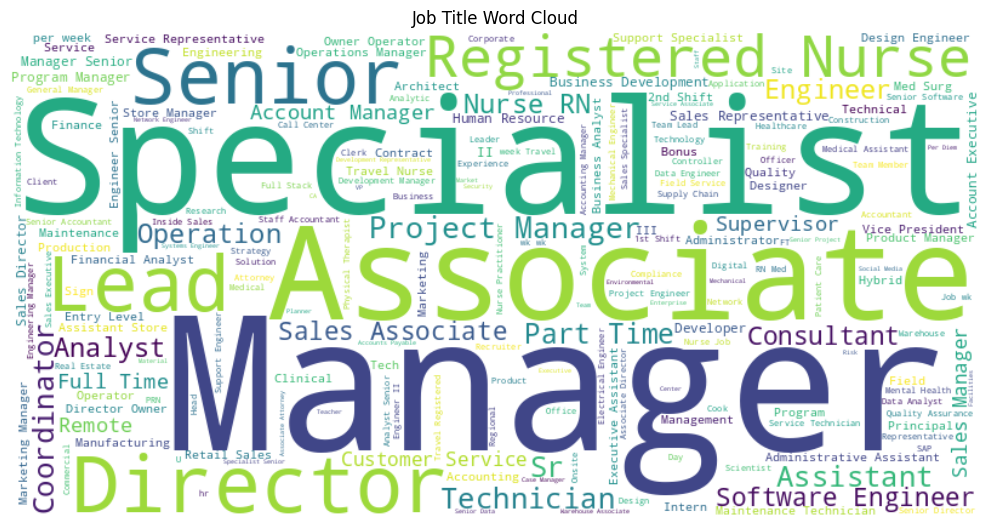

In [ ]:
# Visualization 1: Creating a word cloud from job titles
job_titles_text = ' '.join(df_job_postings['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Job Title Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()

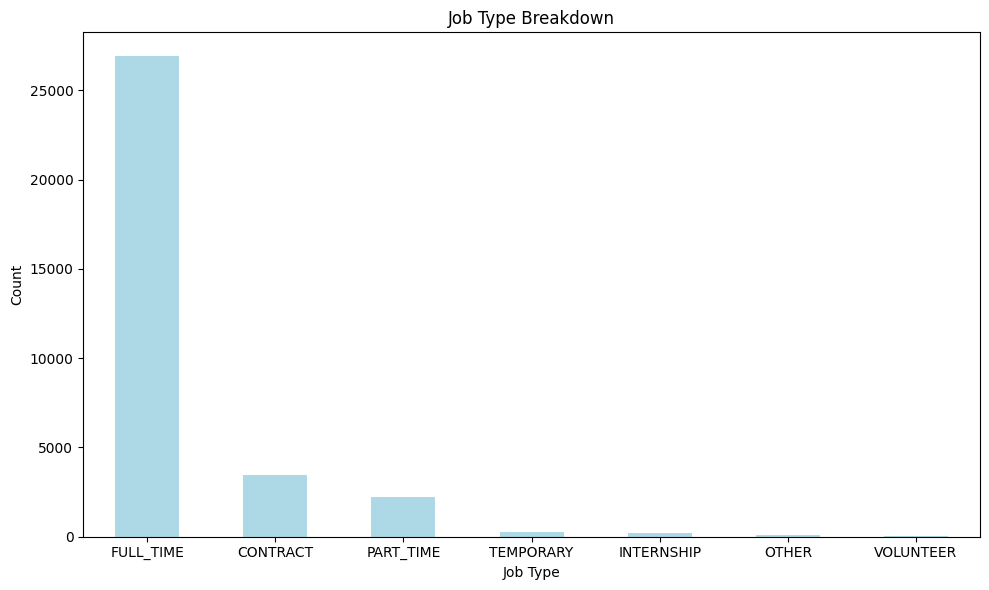

In [ ]:
# Visualization 3: Job Type Breakdown (Bar Chart)
job_type_counts = df_job_postings['work_type'].value_counts()
plt.figure(figsize=(10, 6))
job_type_counts.plot(kind='bar', color='lightblue')
plt.title('Job Type Breakdown')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

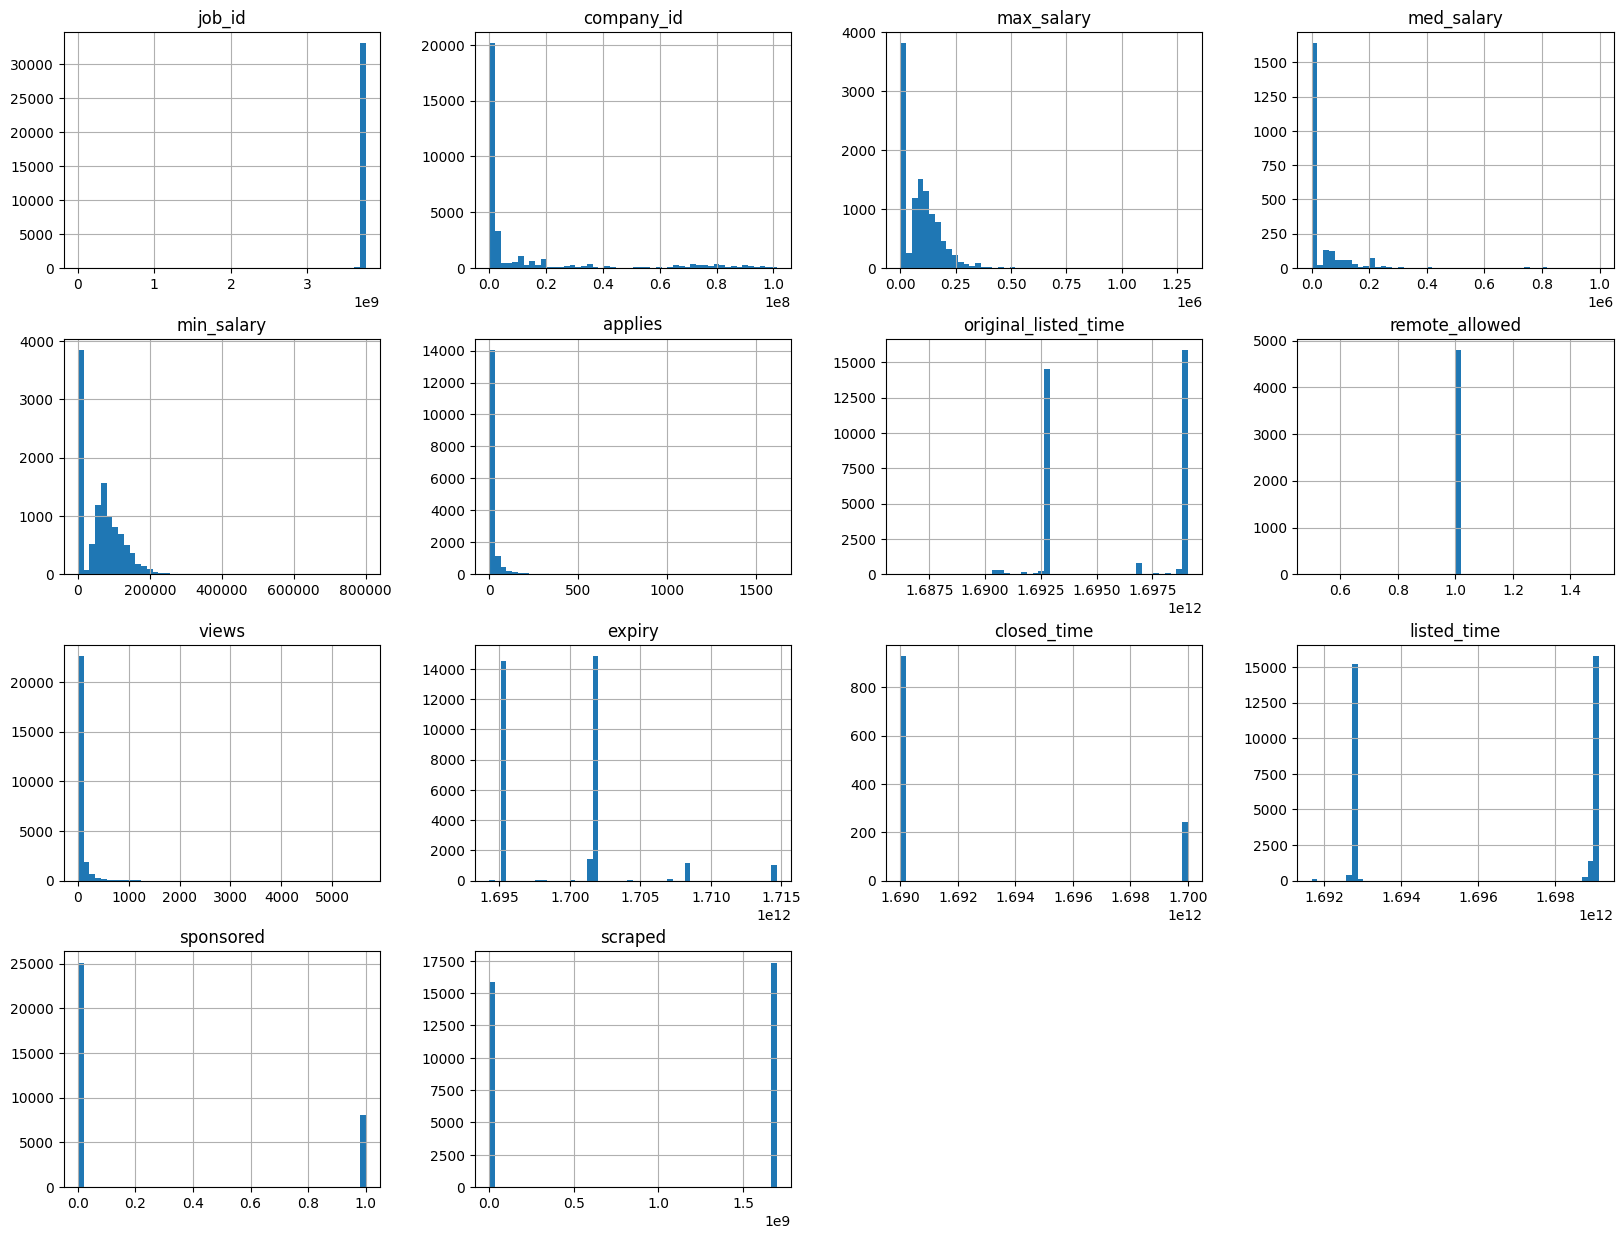

In [ ]:
df_job_postings.hist(bins=50, figsize=(20,15))
plt.show()

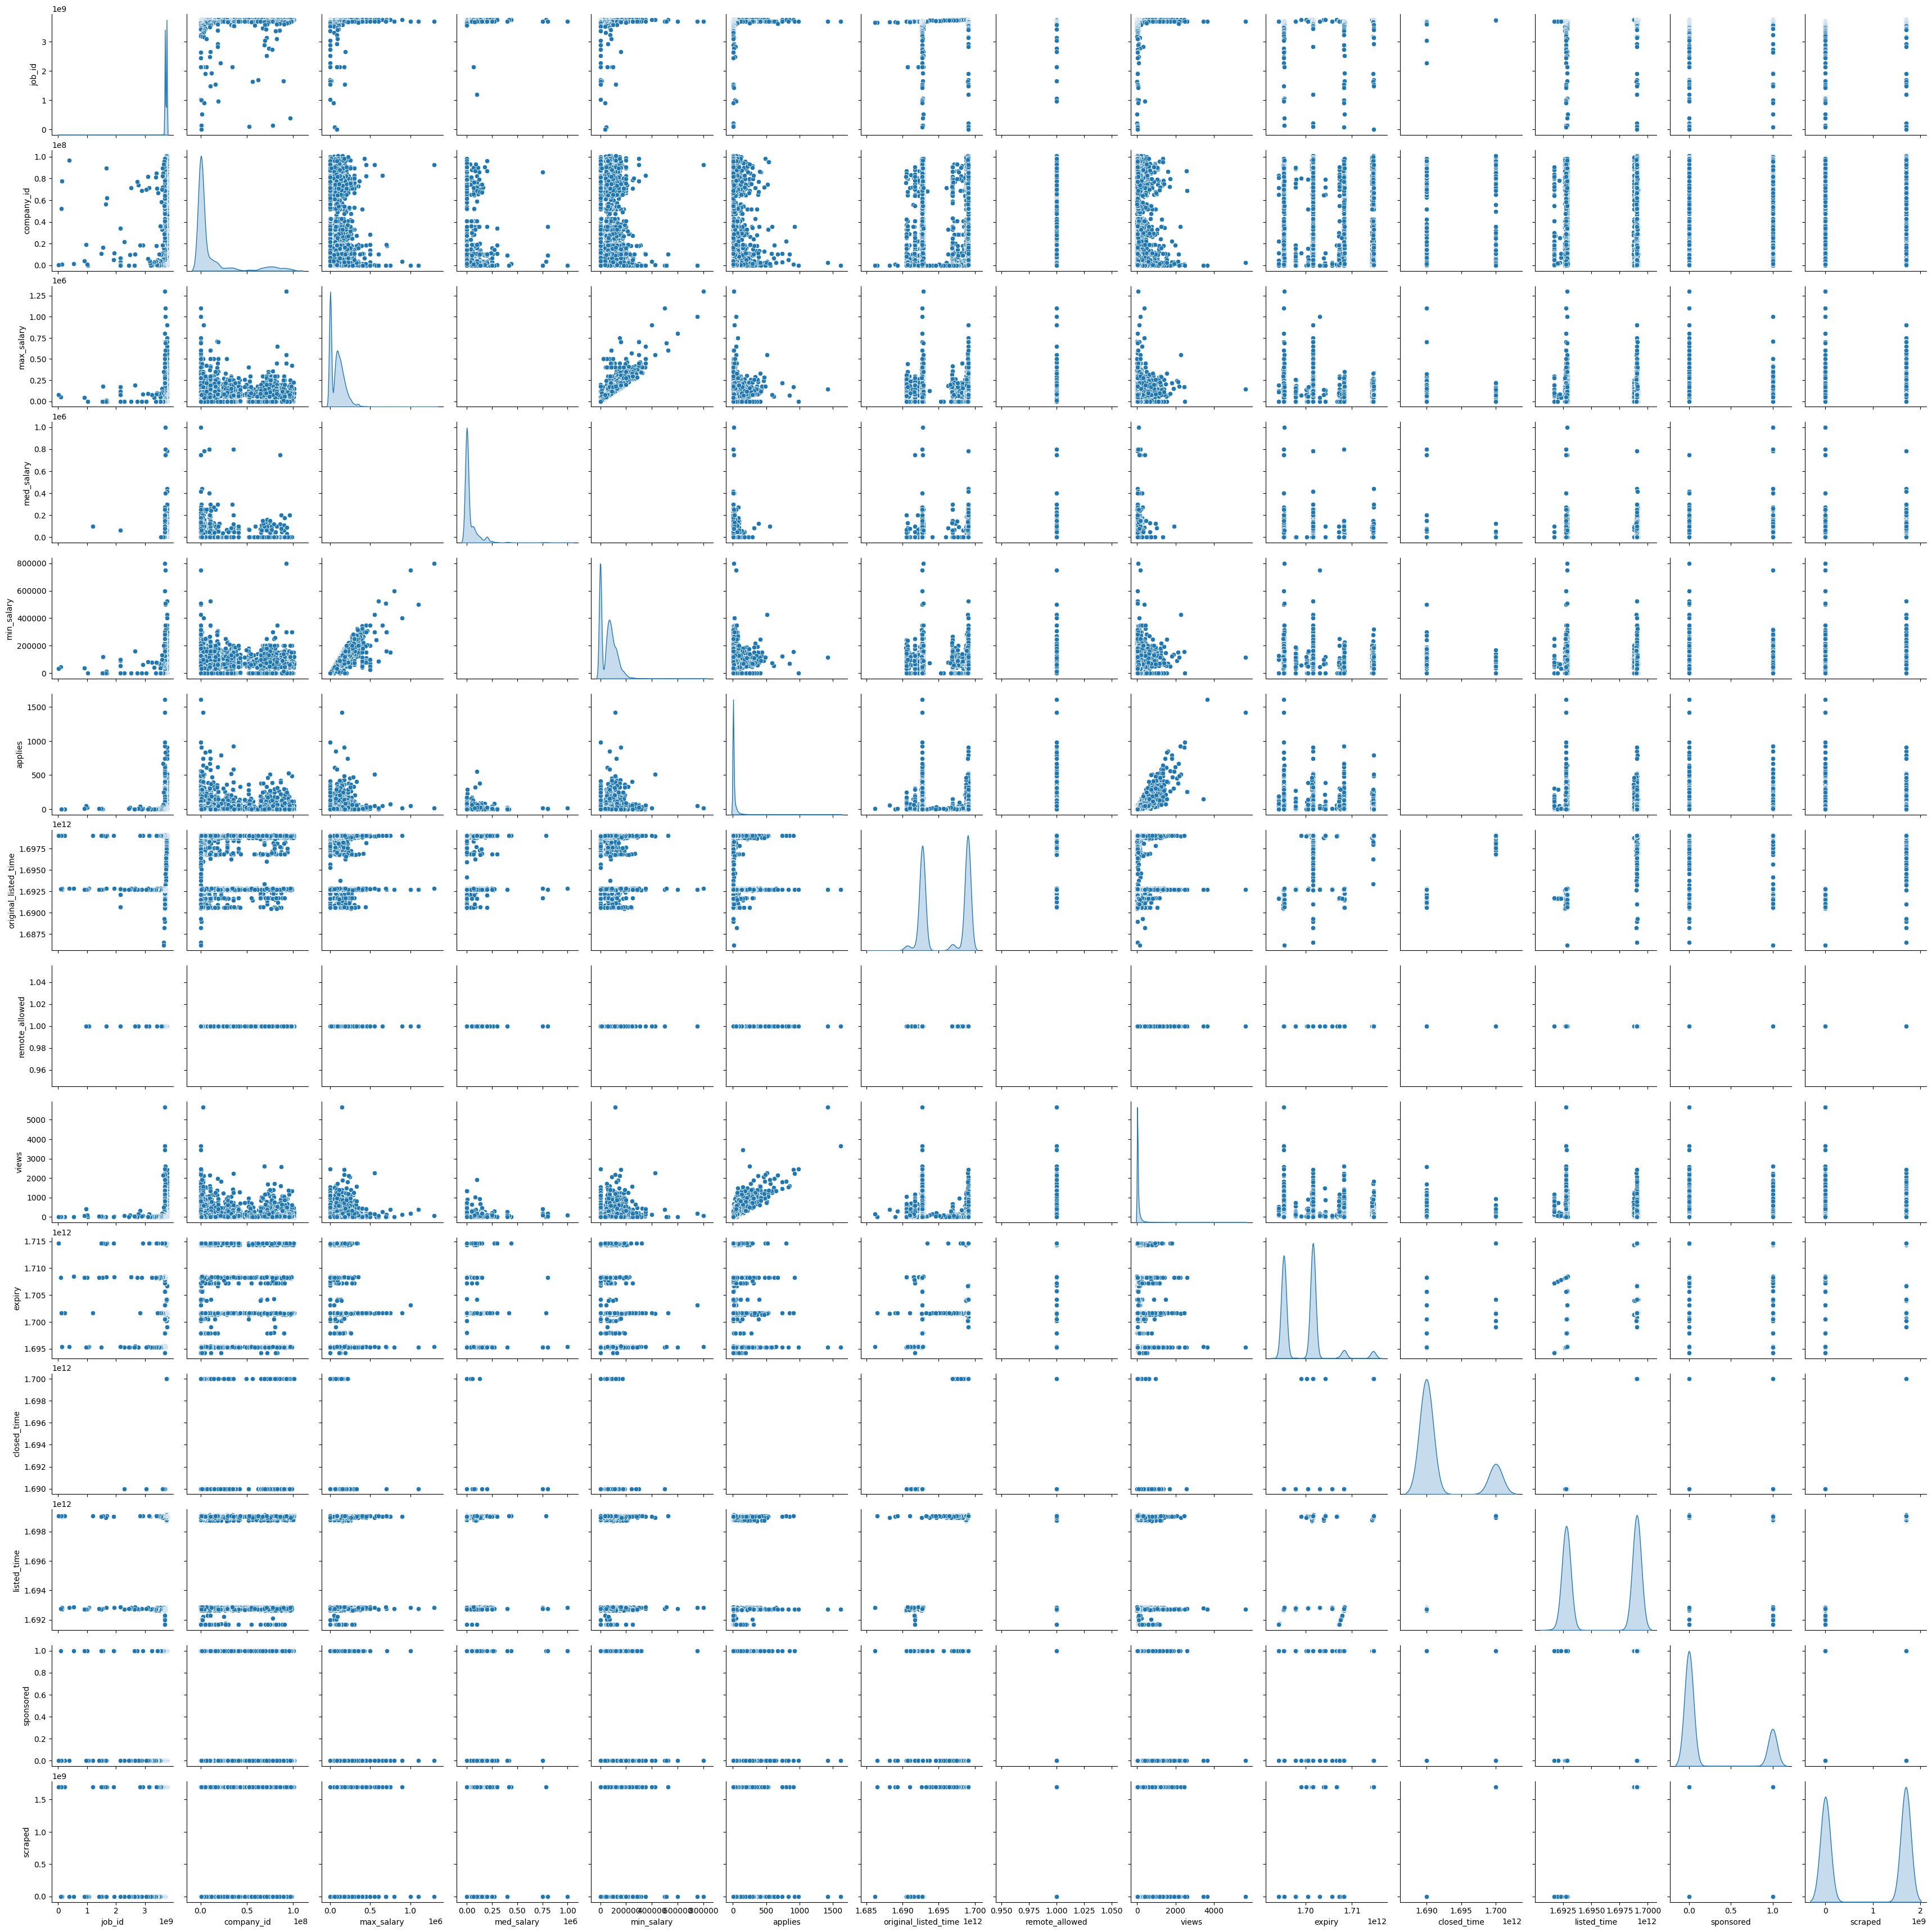

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_job_postings, diag_kind = 'kde')

dapat disumpulkan bahwa pada atribut job_id di dataframe job postings tidak ada yang terduplikasi maupun missing values

In [ ]:
df_job_benefits = pd.read_csv("/content/job_details/benefits.csv")
df_job_benefits.info()
df_job_benefits = df_job_benefits.drop('inferred', axis=1) # remove 'inferred' column
df_job_benefits = df_job_benefits.groupby('job_id')['type'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same job benefits


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29325 entries, 0 to 29324
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   job_id    29325 non-null  int64 
 1   inferred  29325 non-null  int64 
 2   type      29325 non-null  object
dtypes: int64(2), object(1)
memory usage: 687.4+ KB


In [ ]:
df_job_postings = df_job_postings.merge(df_job_benefits, on="job_id", how="left")
df_job_postings

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped,type
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101,"Medical insurance, Disability insurance"
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420,NaN
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644,NaN
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461,NaN
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,1.692830e+12,NaN,0,FULL_TIME,NaN,NaN,1,"Medical insurance, 401(k), Vision insurance"
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,1.699040e+12,NaN,0,FULL_TIME,NaN,NaN,1699044401,NaN
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,...,NaN,NaN,1.699050e+12,NaN,0,FULL_TIME,NaN,NaN,1699063495,NaN
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,1.692750e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,1,"Medical insurance, Vision insurance, Dental in..."


In [ ]:
# merge duplicate job_id on job_skills.csv
df_job_skills = pd.read_csv("/content/job_details/job_skills.csv")
df_job_skills = df_job_skills.groupby('job_id')['skill_abr'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same job skills

df_job_postings= df_job_postings.merge(df_job_skills, on="job_id", how="left")
df_job_postings

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped,type,skill_abr
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101,"Medical insurance, Disability insurance",OTHR
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420,NaN,"MGMT, MNFC"
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644,NaN,ENG
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461,NaN,"MGMT, MNFC"
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346,NaN,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,1.692830e+12,NaN,0,FULL_TIME,NaN,NaN,1,"Medical insurance, 401(k), Vision insurance","SALE, BD"
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,1.699040e+12,NaN,0,FULL_TIME,NaN,NaN,1699044401,NaN,ADM
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,...,NaN,1.699050e+12,NaN,0,FULL_TIME,NaN,NaN,1699063495,NaN,"BD, SALE"
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,1.692750e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,1,"Medical insurance, Vision insurance, Dental in...","SALE, BD"


job_details data is DONE!

### Pre-Process company_details data

In [ ]:
df_companies = pd.read_csv("/content/company_details/companies.csv")

df_company_industries = pd.read_csv("/content/company_details/company_industries.csv")
df_company_industries = df_company_industries.groupby('company_id')['industry'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same company industries

df_company_specialities = pd.read_csv("/content/company_details/company_specialities.csv")
df_company_specialities = df_company_specialities.groupby('company_id')['speciality'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same company specialities

df_employee_counts = pd.read_csv("/content/company_details/employee_counts.csv")
df_employee_counts = df_employee_counts.groupby('company_id')['time_recorded'].max().reset_index() # get newest data based on 'time_recorded' column

df_companies = df_companies.merge(df_company_industries, on="company_id", how="left")
df_companies = df_companies.merge(df_company_specialities, on="company_id", how="left")
df_companies = df_companies.merge(df_employee_counts, on="company_id", how="left")
df_companies

,company_id,name,description,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,"Information Technology & Services, IT Services...","Cloud, Mobile, Cognitive, Security, Research, ...",1.698964e+09
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare,"Hospital & Health Care, Hospitals and Health Care","Healthcare, Biotechnology",1.699063e+09
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower,"Renewables & Environment, Renewable Energy Sem...","Distributed Power, Gasification, Generators, H...",1.699066e+09
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...,"Information Technology & Services, IT Services...",NaN,1.699140e+09
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,"Information Technology & Services, IT Services...","enterprise, software, applications, database, ...",1.699134e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11356,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo,NaN,NaN,NaN
11357,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan,NaN,NaN,NaN
11358,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources,NaN,NaN,NaN
11359,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group,NaN,NaN,NaN


### Merge job_details dan company_details

In [ ]:
merged_data = df_job_postings.merge(df_companies, on="company_id", how="left")
merged_data

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,5.0,New Jersey,US,Somerset,08873,580 Howard Avenue,https://www.linkedin.com/company/hearing-life,Retail,"Digital Hearing Instruments, behind ear, in ea...",1.699131e+09
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,4.0,WI,US,Mayville,53050,1000 Metalcraft Drive,https://www.linkedin.com/company/metalcraft-of...,Industrial Machinery Manufacturing,"Metal Fabrication, Machining, Robotic Welding,...",1.699085e+09
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,4.0,Illinois,US,Wheeling,60090,301E Marquardt Drive,https://www.linkedin.com/company/u.s.-tsubaki-...,Automation Machinery Manufacturing,"Roller Chain, Engineering Class Chain, Sprocke...",1.699086e+09
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,4.0,California,US,Altadena,91001,2212 El Molino Ave,https://www.linkedin.com/company/episcopal-com...,"Non-profit Organization Management, Non-profit...",NaN,1.692864e+09
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,5.0,California,US,Irvine,92618,17400 Laguna Canyon Rd,https://www.linkedin.com/company/iherb,Retail,"Vitamins, Sports Nutrition, Natural Supplement...",1.699064e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.0,California,US,Santa Clarita,28358,Constellation Rd,https://www.linkedin.com/company/cargologinllc,Transportation/Trucking/Railroad,"Export & Import Clearance, Bonded Warehousing,...",1.692835e+09
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,...,1.0,0,US,New York,0,0,https://www.linkedin.com/company/dryerventz-du...,Consumer Services,NaN,1.699063e+09
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check Missing Values
merged_data.isnull().sum()

job_id                            0
company_id                      654
title                             0
description_x                     1
max_salary                    22135
med_salary                    31005
min_salary                    22135
pay_period                    19894
formatted_work_type               0
location                          0
applies                       17008
original_listed_time              0
remote_allowed                28444
views                          7360
job_posting_url                   0
application_url               12250
application_type                  0
expiry                            0
closed_time                   32074
formatted_experience_level     9181
skills_desc                   32909
listed_time                       0
posting_domain                13558
sponsored                         0
work_type                         0
currency                      19894
compensation_type             19894
scraped                     

### Eleminate Certain Column to Use for Recomennder System and Rename the column for better understanding

In [ ]:
selected_column = ['job_id','company_id','title','name','description_x','skills_desc', 'formatted_work_type','location','description_y','company_size','industry']
merged_data = merged_data[selected_column]
merged_data



update_column_name = {'title': 'job_title', 'name': 'company_name', 'description_x': 'job_description',
               'formatted_work_type': 'work_type','description_y': 'company_description'}
data = merged_data.rename(columns=update_column_name)
data = data.dropna()
data

,job_id,company_id,job_title,company_name,job_description,skills_desc,work_type,location,company_description,company_size,industry
2,3757938019,474443.0,"Manager, Engineering","U.S. Tsubaki Power Transmission, LLC",\nThe TSUBAKI name is synonymous with excellen...,Bachelor's Degree in Mechanical Engineering pr...,Full-time,"Bessemer, AL","U.S. Tsubaki Power Transmission, LLC is a subs...",4.0,Automation Machinery Manufacturing
10,3757935384,232541.0,Power Utility Distribution Designer II (Remote),"Sigma Technologies, Ltd.",\nPower Utility Distribution Designer II (Remo...,Education: HS Diploma or equivalent is require...,Full-time,"Hammond, IN","MISSION\nWith an approach that is honest, syst...",3.0,IT Services and IT Consulting
20,3757934944,18270206.0,Branch Manager Truss,TAL Building Centers,\nRole Statement\nTo operate the Truss Plant (...,10-12 years of directly related experience in ...,Full-time,"La Grande, OR","Based in Vancouver, Washington, TAL Building C...",4.0,Retail
89,3757930935,1102373.0,Assistant Manager,Pure Hockey,\nThe Assistant Store Manager supports the Sto...,Previous retail management experience a plusSt...,Full-time,"Cranberry Township, PA",The largest retailer of ice and roller hockey ...,5.0,Retail
199,3757918560,2736008.0,Travel IR Tech - Interventional Radiology Ultr...,"Anders Group, LLC",Description\n\nIR Tech - Interventional Radiol...,Ultrasound Tech - General,Full-time,"Boise, ID",Anders Group is in the business of connecting ...,2.0,Staffing and Recruiting
...,...,...,...,...,...,...,...,...,...,...,...
32309,3693045665,1841.0,Engineering Manager - Santa Ana,Medtronic,\n\nCareers that Change Lives \n\nENGINEERING ...,\n\nMust Have: Minimum Requirements \n\nTo be ...,Full-time,"Santa Ana, CA",A global healthcare technology leader — boldly...,7.0,"Medical Device, Medical Equipment Manufacturing"
32564,3693044437,1552579.0,Principal Scientist,U.S. Silica Company,U.S. Silica Holdings Inc. is a global performa...,EducationDoctorate or better.,Full-time,"Rochelle, IL",U.S. Silica Holdings Inc. is a global performa...,5.0,Mining & Metals
32679,3693043750,1841.0,SAP Tester,Medtronic,Careers that Change Lives \n\nBring your talen...,\n\nMinimum Requirements Required Knowledge an...,Full-time,"Northridge, California, United States",A global healthcare technology leader — boldly...,7.0,"Medical Device, Medical Equipment Manufacturing"
32687,3693043732,1373835.0,Special Education Teacher,"Chancelight Behavioral Health, Therapy, & Educ...","Chancelight Education, a growing, dynamic orga...",EducationBachelors or better in Education or r...,Full-time,"Columbus, GA","ChanceLight Behavioral Health, Therapy, & Educ...",5.0,Higher Education


In [ ]:
data.isnull().sum()

job_id                 0
company_id             0
job_title              0
company_name           0
job_description        0
skills_desc            0
work_type              0
location               0
company_description    0
company_size           0
industry               0
dtype: int64

In [ ]:
# mengurutkan company berdasarkan company_id kemudian dimasukkan ke dalam variabel fix_company
fix_company = data.sort_values('company_id', ascending=True)
fix_company

,job_id,company_id,job_title,company_name,job_description,skills_desc,work_type,location,company_description,company_size,industry
25474,3697352884,1353.0,Netscalar,Tata Consultancy Services,Provide day to day Citrix NetScaler technology...,Network Security- Netscaler,Full-time,"Jacksonville, FL",A purpose-led organization that is building a ...,7.0,"Information Technology & Services, IT Services..."
12819,3755576840,1353.0,Lead Automation Engineer,Tata Consultancy Services,8+ years of validated experience testing (Data...,Selenium,Full-time,"Bloomfield, CT",A purpose-led organization that is building a ...,7.0,"Information Technology & Services, IT Services..."
9292,3756132455,1353.0,Technical Lead,Tata Consultancy Services,Must Have Technical/Functional Skills\n\nDemon...,Service Now,Full-time,"New York, NY",A purpose-led organization that is building a ...,7.0,"Information Technology & Services, IT Services..."
9259,3756133362,1353.0,Java Full Stack Developer,Tata Consultancy Services,Must Have Technical/Functional Skills\n\nMinim...,"Java , Hibernate , Spring , Agile",Full-time,"Culver City, CA",A purpose-led organization that is building a ...,7.0,"Information Technology & Services, IT Services..."
9233,3756134270,1353.0,Service Now Business Analyst,Tata Consultancy Services,Must Have Technical/Functional Skills\n\n4 to ...,Service Now,Full-time,"Los Angeles, CA",A purpose-led organization that is building a ...,7.0,"Information Technology & Services, IT Services..."
...,...,...,...,...,...,...,...,...,...,...,...
29251,3693070674,86694680.0,File Clerk,Ascendion,Position Details\nType (Contract): 12 months C...,"file clerk ,Filing systems,Excel ,Word ,Manage...",Contract,"Springfield, MO",Ascendion is an ally for enterprise digital in...,6.0,"Computer Software, Software Development"
28434,3693584825,86694680.0,Java Full Stack Developer,Ascendion,About Ascendion\nAscendion is a full-service d...,"AWS,Java,API,SQL",Contract,"Tampa, FL",Ascendion is an ally for enterprise digital in...,6.0,"Computer Software, Software Development"
32296,3693045710,86694680.0,Game/ Server Engineer,Ascendion,*Prior gaming experienced REQUIRED - AAA prefe...,"C++,Networking,Gaming,MMO",Contract,"Redmond, WA",Ascendion is an ally for enterprise digital in...,6.0,"Computer Software, Software Development"
26972,3694104220,86694680.0,Dscout UX Researcher,Ascendion,About Ascendion\nAscendion is a full-service d...,"DScout ,UserTesting,Qualitative Research,Quant...",Contract,"Redmond, WA",Ascendion is an ally for enterprise digital in...,6.0,"Computer Software, Software Development"


In [ ]:
# Mengecek berapa jumlah fix_company
len(fix_company.company_id.unique())

123

In [ ]:
# Mengecek kategori job_tittle
fix_company.job_title.unique()

array(['Netscalar', 'Lead Automation Engineer', 'Technical Lead',
       'Java Full Stack Developer', 'Service Now Business Analyst',
       'Adobe Experience Manager', 'Adobe Campaign Consultant', 'Lead',
       'Developer', 'GIAM Secrets / Cyberark Security Specialist',
       'Inside Sales Representative, Respiratory Interventions Service (Carlsbad, CA)',
       'Prin Regulatory Affairs Spec - Clinical', 'Software Engineer I',
       'Engineering Manager - Santa Ana', 'Principal Financial Analyst',
       'SAP Tester', 'Tax Accountant', 'Assistant Real Estate Manager',
       'Sr. Procurement Manager - Exterior Services',
       'Entry Level Life Insurance Sales Agent',
       'Program Manager Energy Efficiency I',
       "Volunteer: Want to help end Alzheimer's? Join The Longest Day Planning Committee!",
       "Volunteer: Go for a run to help end Alzheimer's!",
       'Technical Specialist', 'Senior Electrical Engineer',
       'Senior Computer System Analyst Programmer (Hybrid)',

In [ ]:
preparation = fix_company
preparation.sort_values('company_id')

,job_id,company_id,job_title,company_name,job_description,skills_desc,work_type,location,company_description,company_size,industry
25474,3697352884,1353.0,Netscalar,Tata Consultancy Services,Provide day to day Citrix NetScaler technology...,Network Security- Netscaler,Full-time,"Jacksonville, FL",A purpose-led organization that is building a ...,7.0,"Information Technology & Services, IT Services..."
25475,3697352881,1353.0,GIAM Secrets / Cyberark Security Specialist,Tata Consultancy Services,Provide L3 support for secrets management/PAM ...,"Cyberark , API(Application programming interfa...",Full-time,"Irving, TX",A purpose-led organization that is building a ...,7.0,"Information Technology & Services, IT Services..."
12352,3755582236,1353.0,Developer,Tata Consultancy Services,Job TitleIdentity and Access Management (IAM) ...,IAM,Full-time,"Branchville, NJ",A purpose-led organization that is building a ...,7.0,"Information Technology & Services, IT Services..."
25365,3697355603,1353.0,Lead,Tata Consultancy Services,MUST HAVE \n8-10 years’ experience in Proficie...,NET,Full-time,"Atlanta, GA",A purpose-led organization that is building a ...,7.0,"Information Technology & Services, IT Services..."
25327,3697356381,1353.0,Adobe Campaign Consultant,Tata Consultancy Services,Adobe Campaign Classic8 complete features hand...,Adobe Campaign,Full-time,"Hoboken, NJ",A purpose-led organization that is building a ...,7.0,"Information Technology & Services, IT Services..."
...,...,...,...,...,...,...,...,...,...,...,...
32296,3693045710,86694680.0,Game/ Server Engineer,Ascendion,*Prior gaming experienced REQUIRED - AAA prefe...,"C++,Networking,Gaming,MMO",Contract,"Redmond, WA",Ascendion is an ally for enterprise digital in...,6.0,"Computer Software, Software Development"
26972,3694104220,86694680.0,Dscout UX Researcher,Ascendion,About Ascendion\nAscendion is a full-service d...,"DScout ,UserTesting,Qualitative Research,Quant...",Contract,"Redmond, WA",Ascendion is an ally for enterprise digital in...,6.0,"Computer Software, Software Development"
29251,3693070674,86694680.0,File Clerk,Ascendion,Position Details\nType (Contract): 12 months C...,"file clerk ,Filing systems,Excel ,Word ,Manage...",Contract,"Springfield, MO",Ascendion is an ally for enterprise digital in...,6.0,"Computer Software, Software Development"
28434,3693584825,86694680.0,Java Full Stack Developer,Ascendion,About Ascendion\nAscendion is a full-service d...,"AWS,Java,API,SQL",Contract,"Tampa, FL",Ascendion is an ally for enterprise digital in...,6.0,"Computer Software, Software Development"


In [ ]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('company_id')
preparation

,job_id,company_id,job_title,company_name,job_description,skills_desc,work_type,location,company_description,company_size,industry
25474,3697352884,1353.0,Netscalar,Tata Consultancy Services,Provide day to day Citrix NetScaler technology...,Network Security- Netscaler,Full-time,"Jacksonville, FL",A purpose-led organization that is building a ...,7.0,"Information Technology & Services, IT Services..."
26965,3694104249,1841.0,"Inside Sales Representative, Respiratory Inter...",Medtronic,\n\nCareers that change lives \n\nWe are looki...,Must Have: Minimum Requirements \n\nQualificat...,Full-time,"Carlsbad, CA",A global healthcare technology leader — boldly...,7.0,"Medical Device, Medical Equipment Manufacturing"
29011,3693072591,2319.0,Assistant Real Estate Manager,CBRE,About the role \n * Supports the leadership te...,What you’ll need \n\n To perform this job effe...,Full-time,"San Jose, CA",Operating across every dimension of commercial...,7.0,Real Estate
12717,3755578150,3432.0,Entry Level Life Insurance Sales Agent,New York Life Insurance Company,If you are searching for an excellent opportun...,Qualifications\n\nHigh school diploma or equiv...,Full-time,"New York, NY","For over 175 years, we've been helping people ...",7.0,Financial Services
19414,3701309034,10190.0,Program Manager Energy Efficiency I,PNM Resources,\nTexas New Mexico Power\n\n\n\nJob ID: 608791...,\n\n\n\nPI228655665,Full-time,"Lewisville, TX","Based in Albuquerque, N.M., PNM Resources is a...",4.0,Utilities
...,...,...,...,...,...,...,...,...,...,...,...
18182,3701324659,52835131.0,Accounting Manager,Seabrook Island Club,"Salary range $80,000-$85,000/year. This positi...",Job Requirements\n\n\n \nEducation: Bachelor’s...,Full-time,"Johns Island, SC","Welcome to Seabrook Island, a private, welcomi...",2.0,Hospitality
1436,3757746425,65012347.0,Service Technician,Best-One Tire & Service,\nBest-One Tire & Service is a leading provide...,\nMinimum Job Requirements:\nValid driver's li...,Full-time,"Robinson, IL",Best-One Tire & Service was founded in 1948 wh...,5.0,Truck Transportation
7206,3757451218,76201627.0,Installation Crew Supervisor,American Equipment Holdings,\nAmerican Equipment Holdings is an organizati...,\nPI232435691,Full-time,"Anaheim, CA",Full-service overhead crane and industrial cra...,4.0,Industrial Machinery Manufacturing
3043,3757722366,77681076.0,Real Estate Broker Associate,Keller Williams Laguna Niguel,Are you looking for a leadership opportunity w...,Qualifications\n\nReal estate license required...,Full-time,"Laguna Niguel, CA",Talent. Drive. Innovation. Service.\n\nWe have...,3.0,Real Estate


In [ ]:
# Mengonversi data series ‘company_id’ menjadi dalam bentuk list
company_id = preparation['company_id'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
company_name= preparation['company_name'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
company_size= preparation['company_size'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
job_title= preparation['job_title'].tolist()

# Mengonversi data series ‘Rcuisine’ menjadi dalam bentuk list
work_type = preparation['work_type'].tolist()

print(len(company_id))
print(len(company_name))
print(len(company_size))
print(len(job_title))
print(len(work_type))

123
123
123
123
123


In [ ]:
# Membuat dictionary untuk data ‘resto_id’, ‘resto_name’, dan ‘cuisine’
company_new = pd.DataFrame({
    'id': company_id,
    'name': company_name,
    'size': company_size,
    'job_title': job_title,
    'work_type': work_type
})
company_new

,id,name,size,job_title,work_type
0,1353.0,Tata Consultancy Services,7.0,Netscalar,Full-time
1,1841.0,Medtronic,7.0,"Inside Sales Representative, Respiratory Inter...",Full-time
2,2319.0,CBRE,7.0,Assistant Real Estate Manager,Full-time
3,3432.0,New York Life Insurance Company,7.0,Entry Level Life Insurance Sales Agent,Full-time
4,10190.0,PNM Resources,4.0,Program Manager Energy Efficiency I,Full-time
...,...,...,...,...,...
118,52835131.0,Seabrook Island Club,2.0,Accounting Manager,Full-time
119,65012347.0,Best-One Tire & Service,5.0,Service Technician,Full-time
120,76201627.0,American Equipment Holdings,4.0,Installation Crew Supervisor,Full-time
121,77681076.0,Keller Williams Laguna Niguel,3.0,Real Estate Broker Associate,Full-time


### TF-Vectorizer

In [ ]:
data = company_new
data.sample(10)

,id,name,size,job_title,work_type
84,3293310.0,ŌURA,3.0,"Member Experience, Partner Operations Manager",Full-time
86,3515485.0,VSA Resorts,2.0,Bartender/Server - Scottsdale Camelback Resort,Full-time
54,887776.0,LGH North America,2.0,Lifting Equipment Technician,Full-time
74,2144386.0,Worldwide Assurance for Employees of Public Ag...,1.0,Junior Accountant,Full-time
111,15760876.0,"KAMPGROUNDS ENTERPRISES, INC",3.0,Line Cook - San Diego KOA Resort,Full-time
121,77681076.0,Keller Williams Laguna Niguel,3.0,Real Estate Broker Associate,Full-time
40,384331.0,Chimes,5.0,Assistant Director of Compliance,Full-time
112,16196642.0,Regenexx Corporate Program,2.0,Controller,Full-time
2,2319.0,CBRE,7.0,Assistant Real Estate Manager,Full-time
73,1947704.0,Vergent Products,2.0,Program Manager,Full-time


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['work_type'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['contract', 'full', 'time', 'volunteer'], dtype=object)

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['work_type'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(123, 4)

nilai 10095 ukuran data dan 8 adalah matriks kategori work_type

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.70710678, 0.70710678, 0.        ],
        [0.        , 0.70710678, 0.70710678, 0.        ],
        [0.        , 0.70710678, 0.70710678, 0.        ],
        [0.        , 0.70710678, 0.70710678, 0.        ],
        [0.        , 0.70710678, 0.70710678, 0.        ],
        [0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.70710678, 0.70710678, 0.        ],
        [1.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.70710678, 0.70710678, 0.        ],
        [1.        , 0.        , 0.        , 0.        ],
        [0.        , 0.70710678, 0.70710678, 0.        ],
        [0.        , 0.70710678, 0.70710678, 0.        ],
        [0.        , 0.70710678, 0.70710678, 0.        ],
        [0.        , 0.70710678, 0.70710678, 0.        ],
        [0.        , 0.70710678, 0.70710678, 0.        ],
        [0.        , 0.70710678, 0.70710678, 0.        ],
        [0.   

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.job_title
).sample(4, axis=1).sample(10, axis=0) # 8 itu worktypenya dan 2 itu job_title nya

,time,full,volunteer,contract
job_title,,,,
Commercial Lines Account Manager,0.707107,0.707107,0.0,0.0
Field Service Technician - Junior,0.707107,0.707107,0.0,0.0
Warehouse/Driver Associate,0.707107,0.707107,0.0,0.0
Substance Use Disorder Counselor,0.707107,0.707107,0.0,0.0
Account Executive (Florida),0.707107,0.707107,0.0,0.0
Claims Associate,0.707107,0.707107,0.0,0.0
Controller,0.707107,0.707107,0.0,0.0
Bartender/Server - Scottsdale Camelback Resort,0.707107,0.707107,0.0,0.0
Python Developer,0.707107,0.707107,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['job_title'], columns=data['job_title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (123, 123)


job_title,Contracts Specialist,Program Manager,MRI Technologist- FT,Field Service Technician - Junior,Corporate Counsel | SEC reporting
job_title,,,,,
Production Forklift Operator,1.0,1.0,1.0,1.0,1.0
Installation Technician,1.0,1.0,1.0,1.0,1.0
Entry Level Life Insurance Sales Agent,1.0,1.0,1.0,1.0,1.0
Program Manager Energy Efficiency I,1.0,1.0,1.0,1.0,1.0
Staff Accountant,1.0,1.0,1.0,1.0,1.0
Operations Specialist - Up to $60K,1.0,1.0,1.0,1.0,1.0
Volunteer: Pet Compassion Transport Volunteer,0.0,0.0,0.0,0.0,0.0
Associate Tooling Engineer,1.0,1.0,1.0,1.0,1.0
Human Resources Manager (Bilingual),1.0,1.0,1.0,1.0,1.0


## Modelling CBF

### Dapatkan Rekomendasi berupa TOP N RECOMMENDATION

In [ ]:
def jobs_recommendations(job_title, similarity_data=cosine_sim_df, items=data[['job_title', 'work_type']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_resto : tipe data string (str)
                Nama Restoran (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,job_title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(job_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
# menemukan rekomendasi pekerjaan yang punya work_type sejenis
data[data.job_title.eq('Lead DevOps Engineer')]

,id,name,size,job_title,work_type


In [ ]:
# Mendapatkan rekomendasi pekerjaan yang work_typenya mirip dengan Lead DevOps Engineer
jobs_recommendations('Technical Specialist')

,job_title,work_type
0,Server-over 19 to serve alcohol preferred,Full-time
1,HVAC Project Manager,Full-time
2,Office Manager,Full-time
3,Executive Chef - Stadium Operations,Full-time
4,"Manager, Engineering",Full-time
